# 1-1. Bar Plot 사용하기

- bar plot: 범주(category)에 따른 수치 값을 비교

## 1. 기본 Bar Plot

- `bar()` : 기본적인 bar plot
- `barh()` : horizontal bar plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

x와 y를 5개 정도로 세팅해서 예시 플롯을 만들어보겠습니다.

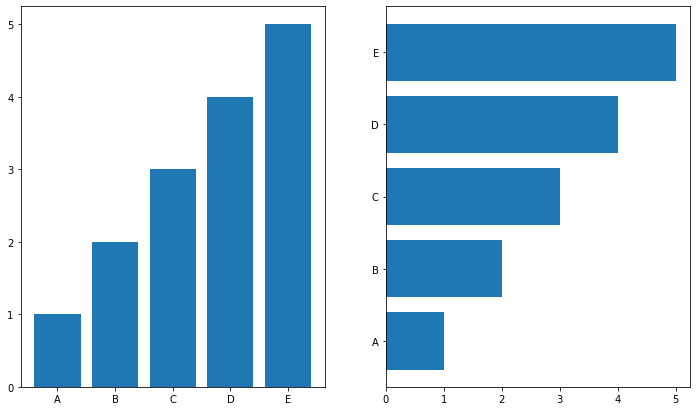

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

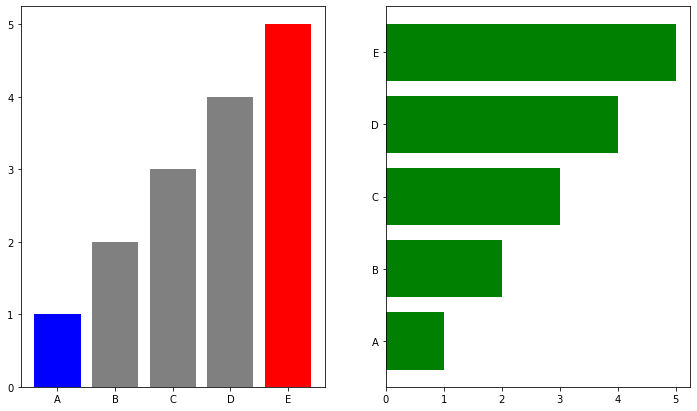

In [4]:
# 강의에서 다루지는 않았지만 막대 그래프의 색은 
# 다음과 같이 변경을 전체로 하거나, 개별로 할 수도 있습니다. 
# 개별로 할 때는 막대 개수와 같이 색을 리스트로 전해야 합니다.
# 색에 대해 구체적인 내용은 3차트의 요소-2색에서 다룹니다.

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

clist = ['blue', 'gray', 'gray', 'gray', 'red']
color = 'green'
axes[0].bar(x, y, color=clist)
axes[1].barh(x, y, color=color)

plt.show()

## 2. 다양한 Bar Plot

### 2-0. 데이터 준비하기

이제 교육용 데이터셋으로 막대 그래프를 사용해보겠습니다.

데이터는 Student Score Dataset입니다. [link](http://roycekimmons.com/tools/generated_data/exams)

- 1000명 학생 성적 데이터 
- feature에 대한 정보는 `head()`, `describe()`, `info()` 등으로 확인하고
- `unique()`, `value_counts()` 등으로 종류나 큰 분포 확인
- feautre들
    - **성별(`gender`)** : female / male
    - **인종민족(`race/ethnicity`)** : group A, B, C, D, E
    - **부모님 최종 학력(`parental level of education`)** : 고등학교 졸업, 전문대, 학사 학위, 석사 학위, 2년제 졸업
    - **점심(`lunch`)** : standard와 free/reduced
    - **시험 예습(`test preparation course`)** : none과 completed
    - **수학, 읽기, 쓰기 성적(`math score`, `reading score`, `writing score`)** (0~100)


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/boostcamp/04_교육내용/000_Data Viz/00_data

/content/drive/MyDrive/Colab Notebooks/boostcamp/04_교육내용/000_Data Viz/00_data


In [9]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5) # head 대신 sample 사용!

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
821,female,group D,bachelor's degree,free/reduced,none,78,90,93
6,female,group B,some college,standard,completed,88,95,92
414,female,group C,bachelor's degree,free/reduced,completed,51,72,79
922,male,group D,high school,standard,none,72,66,66
512,male,group D,some high school,free/reduced,none,62,49,52


In [10]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


그룹에 따른 정보를 시각화해봅시다. 

> 성별에 따른 race/ethincity 분포 (빈도수)

코드로는 다음과 같이 쉽게 구할 수 있습니다.


In [12]:
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print()
print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64


female    518
male      482
Name: gender, dtype: int64


### 2-1. Multiple Bar Plot

우선 기본적으로 그려보겠습니다.

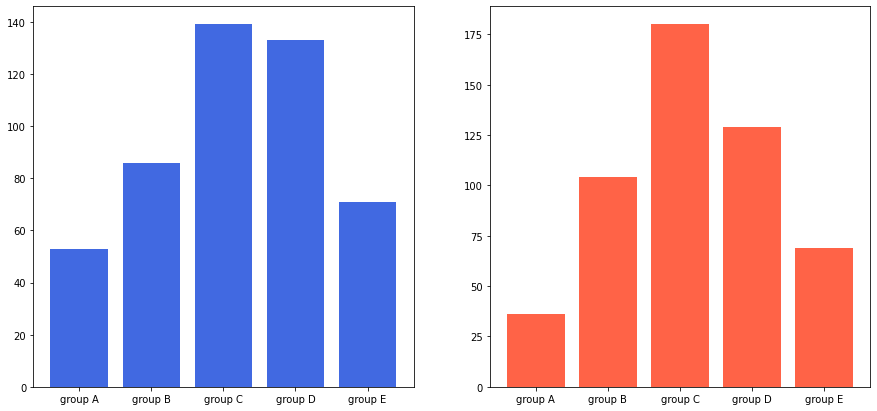

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

각 barplot은 자체적으로 y 범위를 맞추기에 좀 더 y축의 범위를 공유할 수 있습니다.

방법1은 subplot을 만들 때, `sharey` 파라미터를 사용하는 방법입니다.

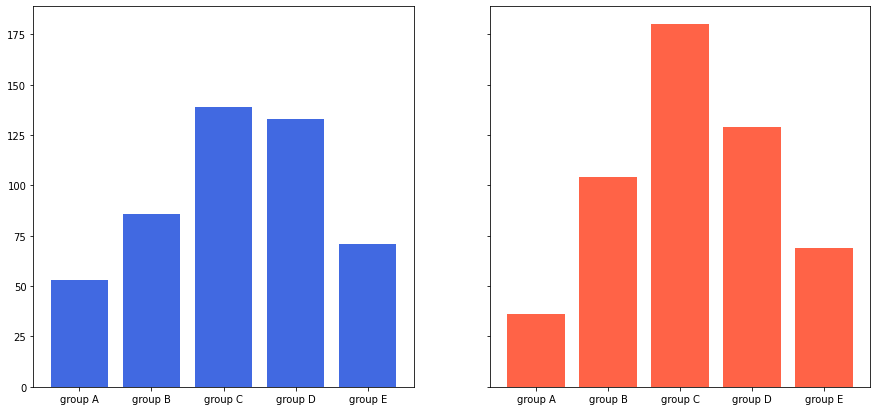

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True) # sharey=True 를 사용하여 y축 공유
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

방법2는 y축 범위를 개별적으로 조정하는 방법입니다. 이렇게 할 때는 반복문을 사용하여 조정하는 방법을 선호합니다.

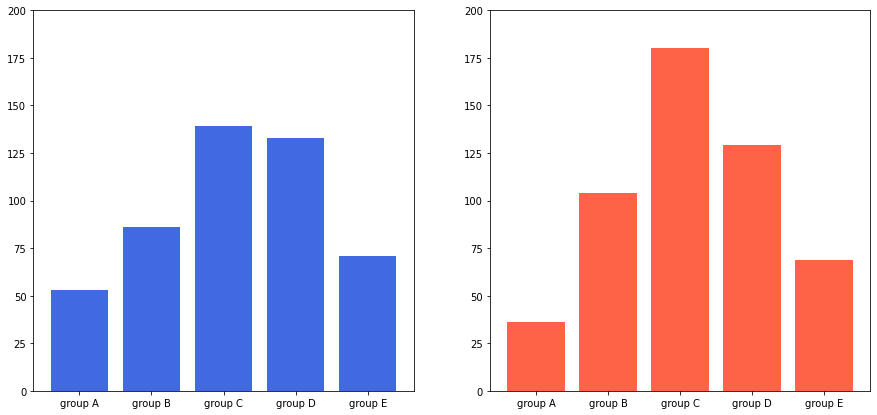

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()

Group간의 비교가 어렵다는 단점이 있습니다.

### 2-2. Stacked Bar Plot

쌓아서 보면 그룹 A, B, C, D, E에 대한 전체 비율은 알기 쉽습니다.


`bottom` 파라미터를 사용해서 아래 공간을 비워둘 수 있습니다.

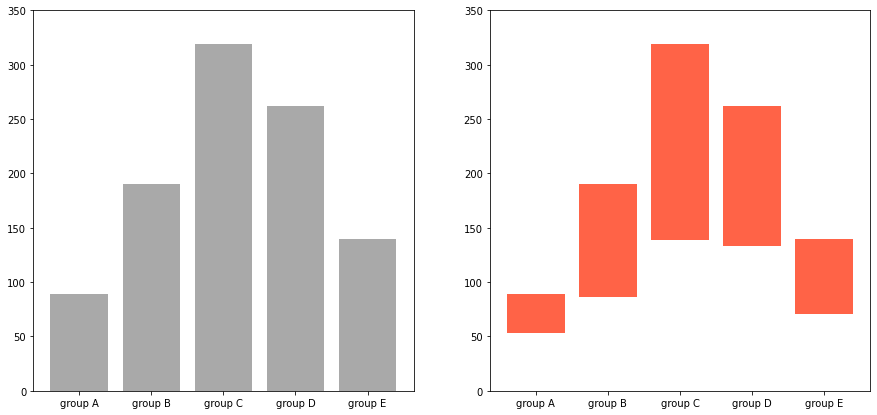

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
#axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato') # bottom 파라미터를 사용하여 stacked bar plot 그리기

for ax in axes:
    ax.set_ylim(0, 350)

plt.show()

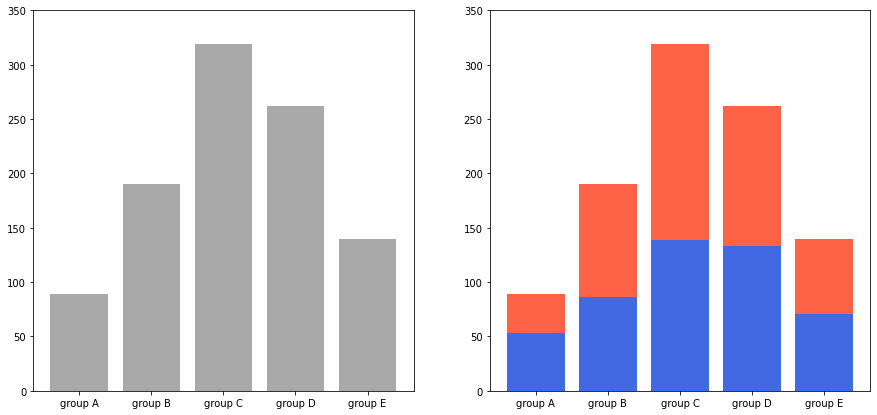

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato') # bottom 파라미터를 사용하여 male 자리 남겨놓기

for ax in axes:
    ax.set_ylim(0, 350)

plt.show()

하지만 위 차트는 여성 데이터에 대한 분포를 확인하기 어렵다.


### 2-3. Percentage Stacked Bar Plot

좀 더 advanced한 테크닉을 사용한다면 다음과 같습니다.

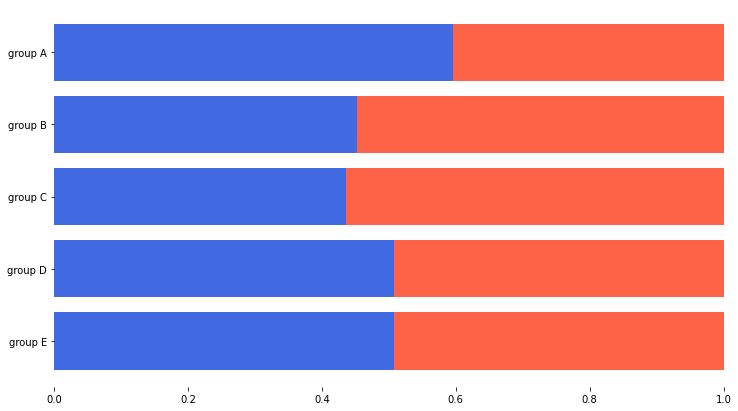

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False) # 역순 정렬 (barh 는 아래에서 부터 그려지기 때문)
total = group['male'] + group['female'] # 각 그룹별 합

ax.barh(group['male'].index, group['male']/total, color='royalblue')
ax.barh(group['female'].index, group['female']/total, left=group['male']/total, color='tomato') # left 파라미터를 사용하여 male 자리 남겨놓기

ax.set_xlim(0, 1)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False) # spine(한 변)을 set_visible(False) 를 사용하여 지우기

plt.show()

### 2-4. Overlapped Bar Plot

겹치는 투명도는 꼭 정해진 것이 아닌 다양한 실험을 통해 선택하면 됩니다.

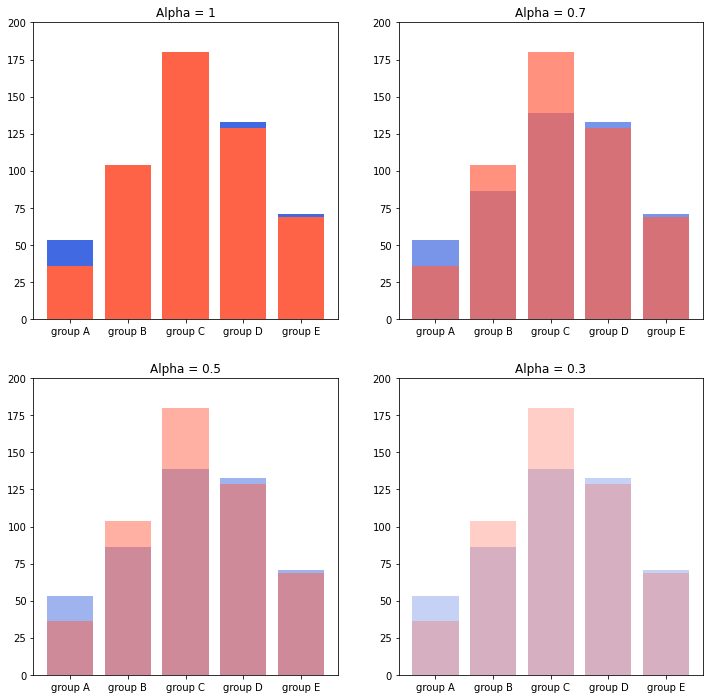

In [19]:
group = group.sort_index() # 다시 정렬

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten() # (2,2) -> (4,1)

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'], color='royalblue', alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'], color='tomato', alpha=alpha)
    axes[idx].set_title(f"Alpha = {alpha}")

for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

### 2-5. Grouped Bar Plot

크게 3가지 테크닉으로 구현 가능합니다.

- x축 조정
- `width`  조정
- `xticks`, `xticklabels`

원래 x축이 0, 1, 2, 3로 시작한다면
    - 한 그래프는 0-width/2, 1-width/2, 2-width/2 로 구성하면 되고
    - 한 그래프는 0+width/2, 1+width/2, 2+width/2 로 구성하면 됩니다.

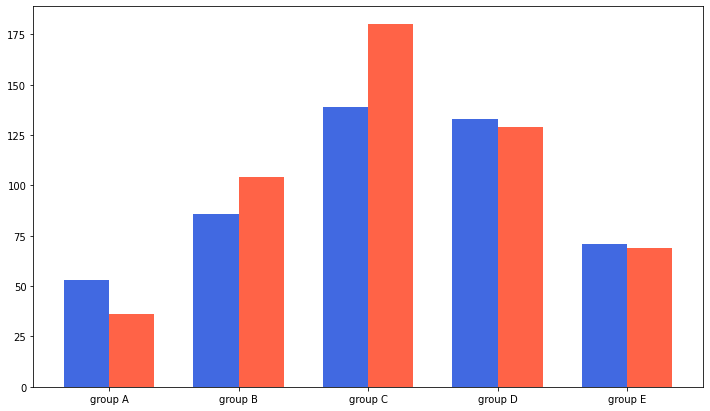

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width = 0.35

ax.bar(idx-width/2, group['male'], color='royalblue', width=width)
ax.bar(idx+width/2, group['female'], color='tomato', width=width)

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)

plt.show()

그리고 추가적으로 label + legend를 달아 색에 대한 설명도 추가하면 좋습니다.

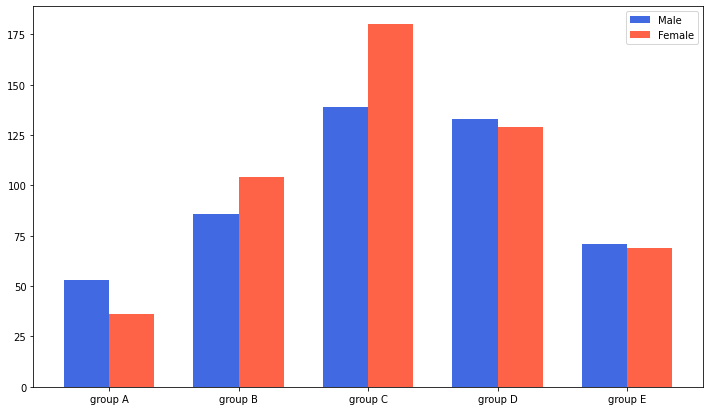

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue',
       width=width, label='Male')

ax.bar(idx+width/2, group['female'], 
       color='tomato',
       width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()    
    
plt.show()

그렇다면 그룹이 N개 일때는 어떻게 하면 될까요?

그룹의 개수에 따라 x좌표는 다음과 같습니다.

- 2개 : -1/2, +1/2
- 3개 : -1, 0, +1 (-2/2, 0, +2/2)
- 4개 : -3/2, -1/2, +1/2, +3/2

규칙이 보이시나요?

$-\frac{N-1}{2}$에서 $\frac{N-1}{2}$까지 분자에 2간격으로 커지는 것이 특징입니다.


그렇다면 index i(zero-index)에 대해서는 다음과 같이 x좌표를 계산할 수 있습니다.

$x+\frac{-N+1+2\times i}{2}\times width$

이번엔 인종/민족 그룹에 따른 Parental Level of Education Grouped Bar Plot으로 그려보겠습니다.

In [22]:
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()

In [23]:
group

parental level of education  race/ethnicity
associate's degree           group A           14
                             group B           41
                             group C           78
                             group D           50
                             group E           39
bachelor's degree            group A           12
                             group B           20
                             group C           40
                             group D           28
                             group E           18
high school                  group A           18
                             group B           48
                             group C           64
                             group D           44
                             group E           22
master's degree              group A            3
                             group B            6
                             group C           19
                             group D           23
      

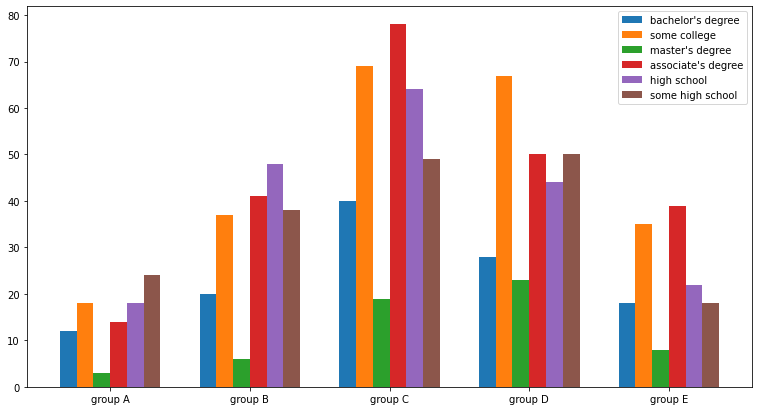

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width=0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g], 
       width=width, label=g)

ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()    
    
plt.show()

## 3. 정확한 Bar Plot

### 3-1. Principle of Proportion Ink

성별에 따른 성적을 막대그래프로 비교해보겠습니다.

In [25]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


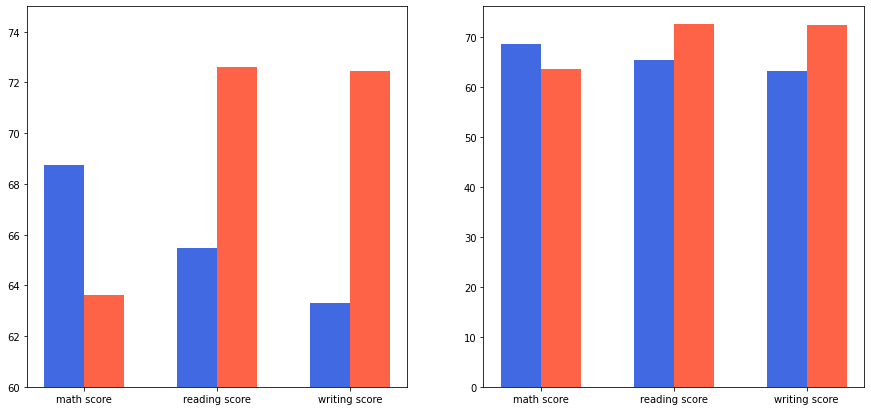

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

idx = np.arange(len(score.index))
width = 0.3

for ax in axes:
    ax.bar(idx-width/2, score['male'], color='royalblue', width=width)
    ax.bar(idx+width/2, score['female'], color='tomato', width=width)
    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)

axes[0].set_ylim(60, 75)

plt.show()

비교를 위한다면 세로를 늘리는 게 더 좋을 수 있습니다.

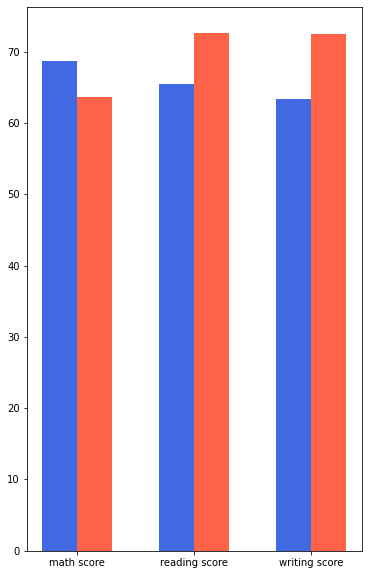

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 10)) # figsize 를 이용해서 비율을 늘릴 수 있다.

idx = np.arange(len(score.index))
width=0.3

ax.bar(idx-width/2, score['male'], 
       color='royalblue',
       width=width)

ax.bar(idx+width/2, score['female'], 
       color='tomato',
       width=width)

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
    
plt.show()

### 3-2 데이터 정렬하기

In [28]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3-3. 적절한 공간 활용 

다양한 공간 테크닉을 살펴보겠습니다.

대조군을 위해 2개의 같은 플롯을 그려보겠습니다.

- X/Y axis Limit (`.set_xlim()`, `.set_ylime()`)
- Margins (`.margins()`)
- Gap (`width`)
- Spines (`.spines[spine].set_visible()`)


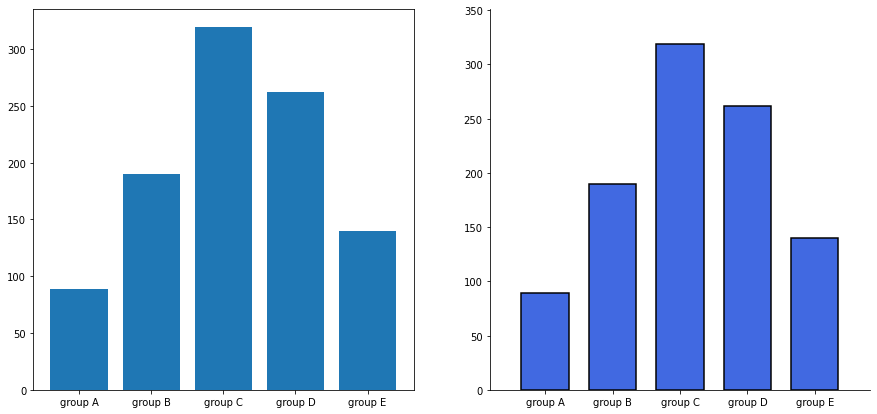

In [36]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)
ax.bar(group_cnt.index, group_cnt, width=0.7, edgecolor='black', linewidth=1.5, color='royalblue')
ax.margins(0.1, 0.1) # default: 0.05 (5%)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### 3-4. 복잡함과 단순함

그리드나 텍스트를 추가해보며 어떤 게 더 좋을지 고민해보겠습니다.

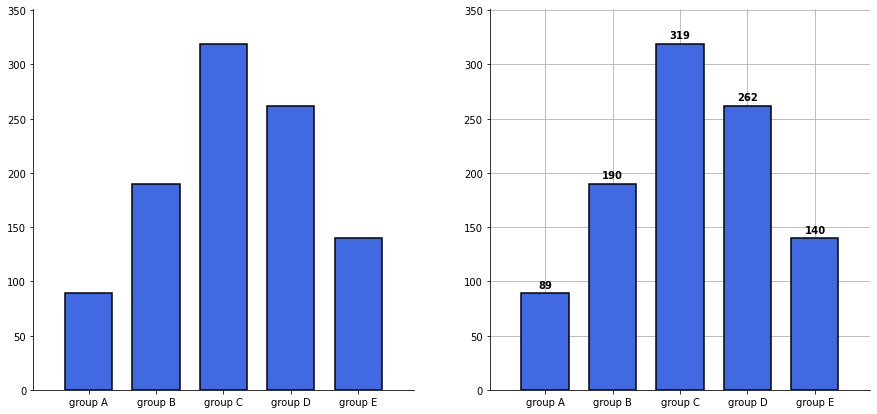

In [41]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for ax in axes:
    ax.bar(group_cnt.index, group_cnt, width=0.7, edgecolor='black', linewidth=1.5, color='royalblue', zorder=10)
    ax.margins(0.1, 0.1)
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

axes[1].grid(zorder=0) # 그리드 추가

# 텍스트 추가
for idx, value in zip(group_cnt.index, group_cnt):
    axes[1].text(idx, value+5, s=value, ha='center', fontweight='bold')

plt.show()

### 3-5. ETC

오차막대(`errorbar`)를 사용하여 편차 등의 정보를 추가해보겠습니다.

In [42]:
score_var = student.groupby('gender').std().T # 표준편차
score_var

gender,female,male
math score,15.491453,14.356277
reading score,14.378245,13.931832
writing score,14.844842,14.113832


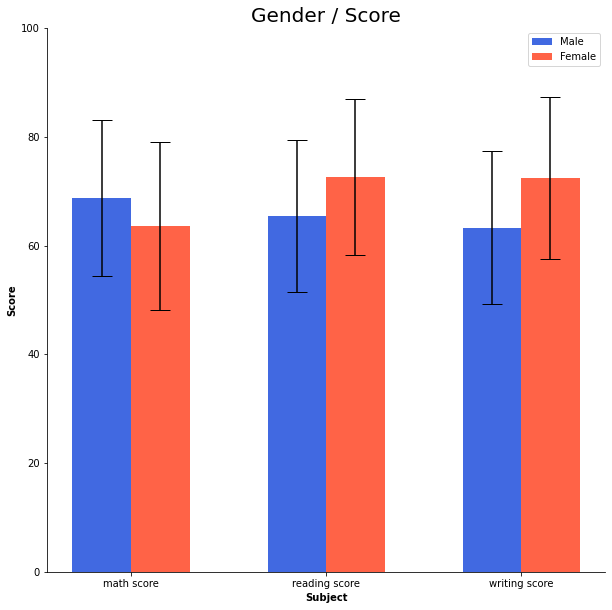

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width = 0.3

ax.bar(idx-width/2, score['male'], color='royalblue', width=width, label='Male', yerr=score_var['male'], capsize=10)
ax.bar(idx+width/2, score['female'], color='tomato', width=width, label='Female', yerr=score_var['female'], capsize=10)

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()